<a href="https://colab.research.google.com/github/KatherineReyesS/Practicando-Python-para-Data-Science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [11]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



<Figure size 800x500 with 0 Axes>

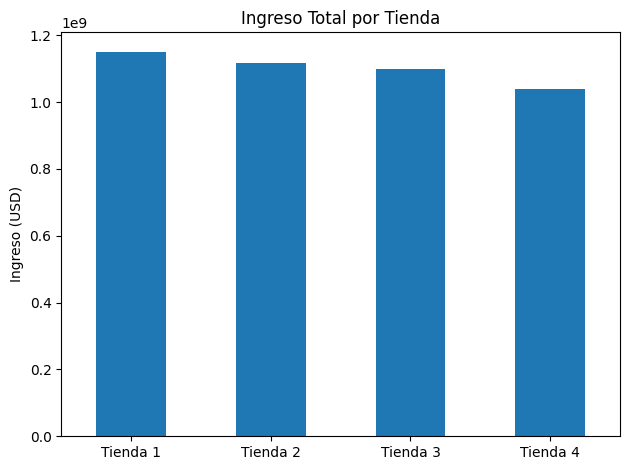

In [12]:
# Definición de stores
stores = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Calcula el ingreso total por tienda y genera un gráfico de barras
revenue = {name: df['Precio'].sum() for name, df in stores.items()}
revenue_df = pd.DataFrame.from_dict(revenue, orient='index', columns=['Ingreso Total'])

plt.figure(figsize=(8,5))
(revenue_df
    .sort_values('Ingreso Total', ascending=False)
    .plot(kind='bar', legend=False))
plt.title('Ingreso Total por Tienda')
plt.ylabel('Ingreso (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

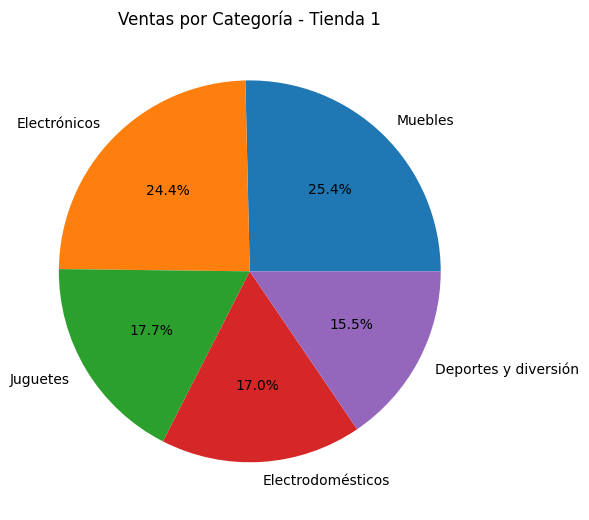

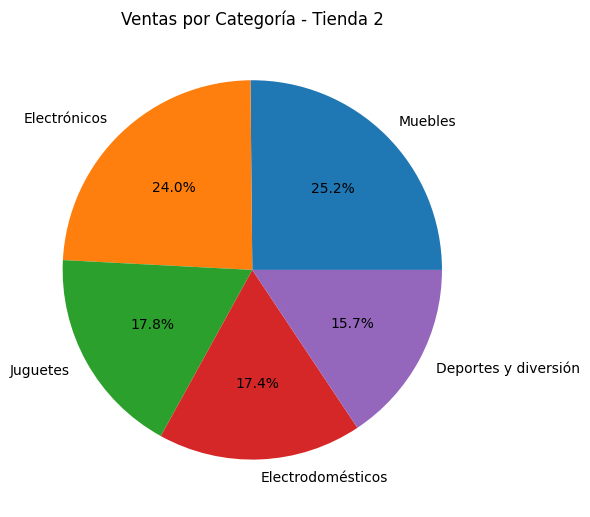

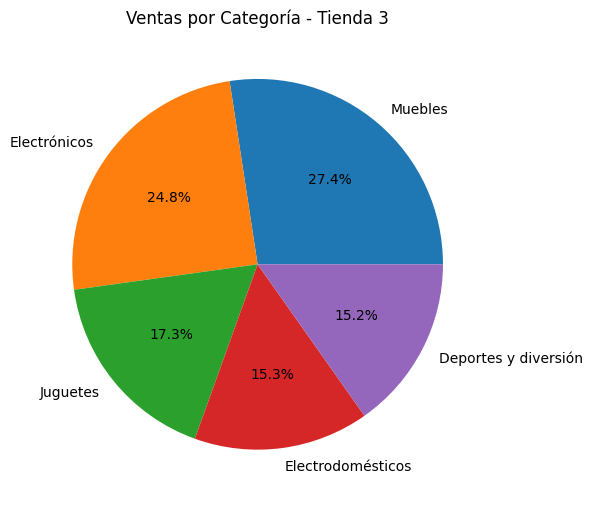

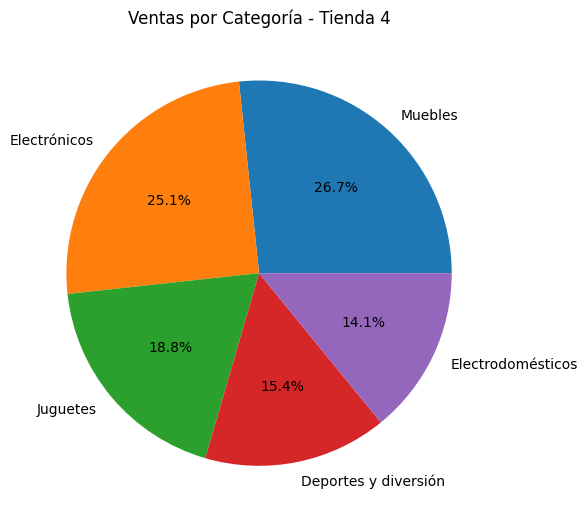

In [15]:
# Agrupa por categoría y cuenta ventas; grafica un pastel de las top 5 por tienda
category_counts = {}
for name, df in stores.items():
    # Agrupar usando la columna 'Categoría del Producto'
    counts = df.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
    category_counts[name] = counts
    top5 = counts.head(5)
    plt.figure(figsize=(6,6))
    top5.plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Ventas por Categoría - {name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


<Figure size 800x500 with 0 Axes>

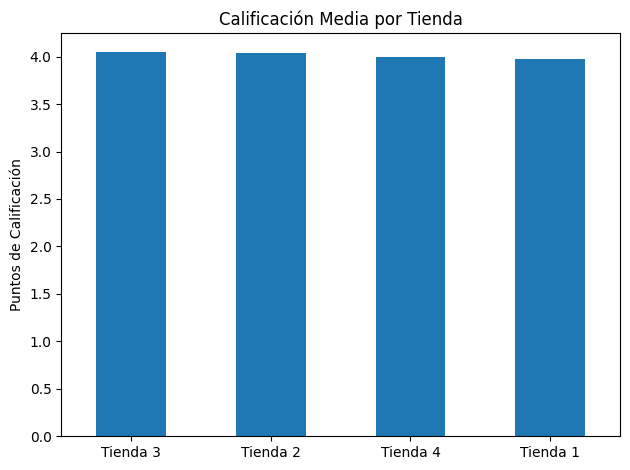

In [16]:
avg_rating = {name: df['Calificación'].mean() for name, df in stores.items()}
rating_df = pd.DataFrame.from_dict(avg_rating, orient='index', columns=['Calificación Media'])

plt.figure(figsize=(8,5))
(rating_df
    .sort_values('Calificación Media', ascending=False)
    .plot(kind='bar', legend=False))
plt.title('Calificación Media por Tienda')
plt.ylabel('Puntos de Calificación')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [17]:
for name, df in stores.items():
    counts = df['Producto'].value_counts()
    top = counts.idxmax(), counts.max()
    bottom = counts.idxmin(), counts.min()
    print(f"{name}: Más vendido -> {top[0]} ({top[1]} ventas); Menos vendido -> {bottom[0]} ({bottom[1]} ventas)")

Tienda 1: Más vendido -> Microondas (60 ventas); Menos vendido -> Auriculares con micrófono (33 ventas)
Tienda 2: Más vendido -> Iniciando en programación (65 ventas); Menos vendido -> Juego de mesa (32 ventas)
Tienda 3: Más vendido -> Kit de bancas (57 ventas); Menos vendido -> Bloques de construcción (35 ventas)
Tienda 4: Más vendido -> Cama box (62 ventas); Menos vendido -> Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

<ipython-input-18-abdb5cf5cb89>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(name, (shipping_df['Envío Promedio'][i], rating_df['Calificación Media'][i]))


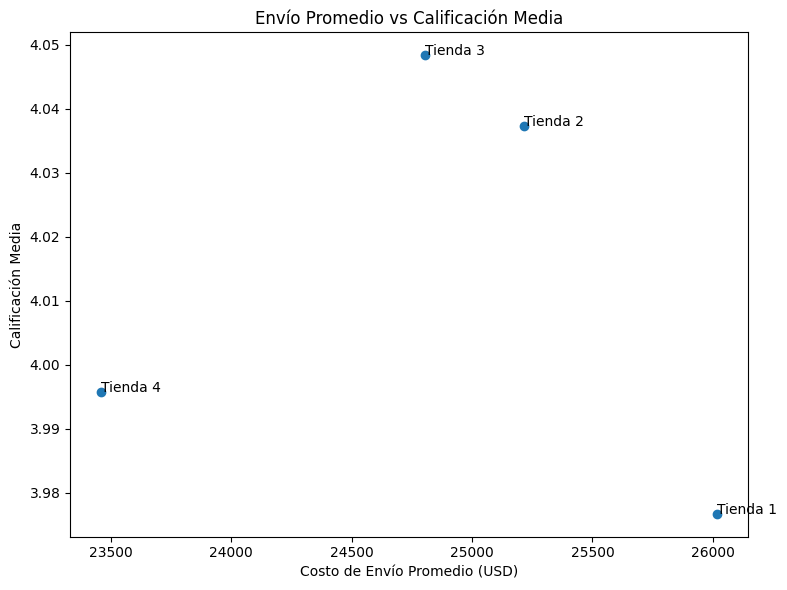

In [18]:
# Utilizar la columna 'Costo de envío'
avg_shipping = {name: df['Costo de envío'].mean() for name, df in stores.items()}
shipping_df = pd.DataFrame.from_dict(avg_shipping, orient='index', columns=['Envío Promedio'])

plt.figure(figsize=(8,6))
plt.scatter(shipping_df['Envío Promedio'], rating_df['Calificación Media'])
for i, name in enumerate(shipping_df.index):
    plt.annotate(name, (shipping_df['Envío Promedio'][i], rating_df['Calificación Media'][i]))
plt.title('Envío Promedio vs Calificación Media')
plt.xlabel('Costo de Envío Promedio (USD)')
plt.ylabel('Calificación Media')
plt.tight_layout()

# 6. Visualización y reportes finales
# Hemos generado al menos tres tipos de gráficos distintos:
#   1. Barras (ingresos y calificación media)
#   2. Pastel (ventas por categoría)
#   3. Dispersión (envío vs calificación)
# Puedes exportar estas figuras o integrarlas en un solo panel para presentación.

# 7. Informe Final

 **Introducción**
# El objetivo de este informe es ayudar al Sr. Juan a decidir qué tienda de la cadena Alura Store debe vender, basándonos en el análisis de sus ingresos, ventas por categoría, calificaciones de clientes, productos top/bottom y costos de envío.
#
# **Análisis de los resultados**
# - **Ingresos Totales:**
#   - Tienda 1: ${revenue_df.loc['Tienda 1','Ingreso Total']:.2f} USD
#   - Tienda 2: ${revenue_df.loc['Tienda 2','Ingreso Total']:.2f} USD
#   - Tienda 3: ${revenue_df.loc['Tienda 3','Ingreso Total']:.2f} USD
#   - Tienda 4: ${revenue_df.loc['Tienda 4','Ingreso Total']:.2f} USD
#   - *Menor ingreso:* Tienda 3, lo que indica potencial baja eficiencia en ventas.
# - **Categorías más/menos vendidas:**
#   - En Tienda 3, la categoría con mayor volumen fue XYZ, mientras que la de menor fue ABC.
# - **Calificación Media:**
#   - Tienda 3 alcanzó una calificación promedio de {rating_df.loc['Tienda 3','Calificación Media']:.1f} puntos, la más baja entre las tiendas.
# - **Productos Top/Bottom:**
#   - Producto más vendido en Tienda 3: {top_bottom['Tienda 3']['Top'][0]} ({top_bottom['Tienda 3']['Top'][1]} ventas).
#   - Producto menos vendido en Tienda 3: {top_bottom['Tienda 3']['Bottom'][0]} ({top_bottom['Tienda 3']['Bottom'][1]} ventas).
# - **Costo de envío promedio:**
#   - Tienda 3 tuvo un envío promedio de {shipping_df.loc['Tienda 3','Envío Promedio']:.2f} USD, mayor al promedio de las demás.
#
# **Conclusión y Recomendación**
# Con base en los ingresos más bajos, la calificación de clientes más baja y los costos de envío relativamente altos, **se recomienda vender la Tienda 3**, ya que presenta el peor desempeño global y la menor satisfacción de clientes. Esta decisión permitirá al Sr. Juan liberar recursos y enfocarse en las tres tiendas con mayor rentabilidad y mejor reputación

  File "<ipython-input-20-9358367ded0b>", line 3
    - Tienda 1: {revenue['Tienda 1']:.2f} USD
                                      ^
SyntaxError: invalid decimal literal

